<a href="https://colab.research.google.com/github/frankl1/Introduction-to-Tensorflow-for-Deep-Learning/blob/master/exercise_flowers_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [0]:
import numpy as np
import os
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow 2.x selected.


# Loading the data

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file_path = tf.keras.utils.get_file(fname="flower_photos.tgz", origin=_URL, extract=True)

base_dir = os.path.join(os.path.dirname(zip_file_path), "flower_photos")

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
!ls {base_dir}

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [0]:
num_train = 0
num_val = 0
for c in classes:
  images = glob.glob(f"{base_dir}/{c}/*.jpg")
  train_path = os.path.join(base_dir, "train", c)
  val_path = os.path.join(base_dir, "val", c)
  try:
    os.makedirs(train_path)
    os.makedirs(val_path)
    train_imgs, val_imgs= images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

    for img in train_imgs:
      num_train += 1
      shutil.move(img, train_path)

    for img in val_imgs:
      num_val += 1
      shutil.move(img, val_path)
  except FileExistsError as e:
    print(e)

In [0]:
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Data visualization

In [0]:
IMG_SHAPE = 150
BATCH_SIZE = 100
EPOCH = 80

In [8]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_data_gen = image_gen.flow_from_directory(
    train_dir, 
    target_size=(IMG_SHAPE, IMG_SHAPE), 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

Found 2935 images belonging to 5 classes.


In [0]:
def plotImage(images):
  fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(25, 25))
  fig.tight_layout()
  for img, ax in zip(images, axes.reshape(10)):
    ax.imshow(img[0])
    ax.set_xlabel(classes[np.argmax(img[1])])

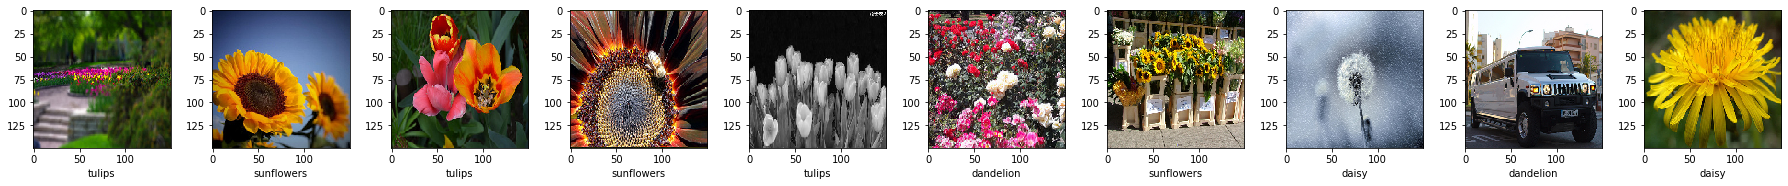

In [0]:
sample = [(train_data_gen[0][0][i], train_data_gen[0][1][i]) for i in range(10)]
plotImage(sample)

# Data Augmentation
## Random Horizontal Flip

In [0]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, target_size=(IMG_SHAPE, IMG_SHAPE), shuffle=True)

Found 2935 images belonging to 5 classes.


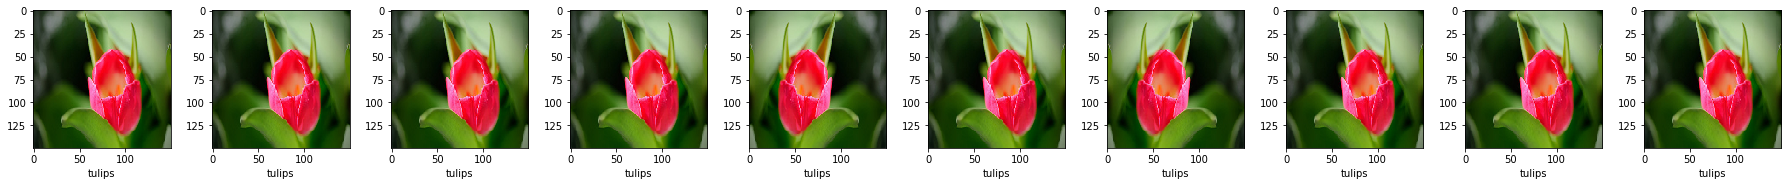

In [0]:
sample = [(train_data_gen[0][0][0], train_data_gen[0][1][0]) for i in range(10)]
plotImage(sample)

## Random 45 rotation

In [0]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), batch_size=BATCH_SIZE)

Found 2935 images belonging to 5 classes.


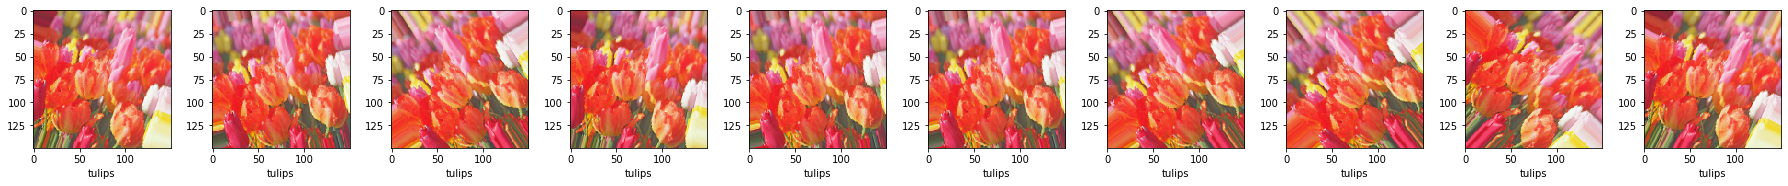

In [0]:
sample = [(train_data_gen[0][0][0], train_data_gen[0][1][0]) for i in range(10)]
plotImage(sample)

## Random 50% zoom

In [0]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, zoom_range=0.5)
train_image_gen = image_gen.flow_from_directory(train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), batch_size=BATCH_SIZE)

Found 2935 images belonging to 5 classes.


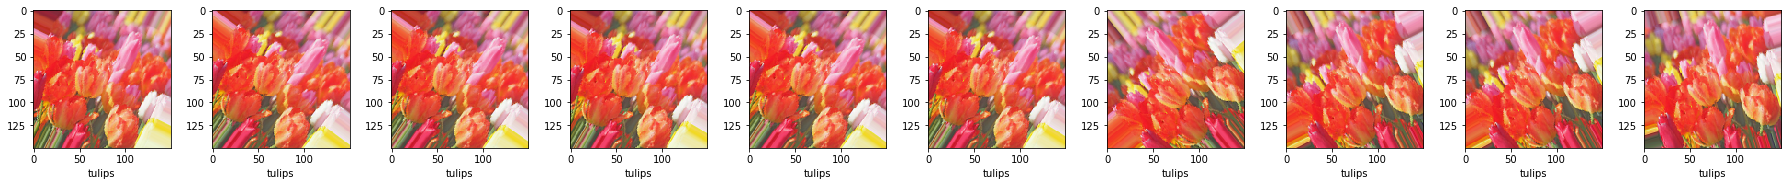

In [0]:
sample = [(train_data_gen[0][0][0], train_data_gen[0][1][0]) for i in range(10)]
plotImage(sample)

## Width and height shift

In [0]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, width_shift_range=0.2, height_shift_range=0.2)
train_image_gen = image_gen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, target_size=(IMG_SHAPE, IMG_SHAPE), shuffle=True)

Found 2935 images belonging to 5 classes.


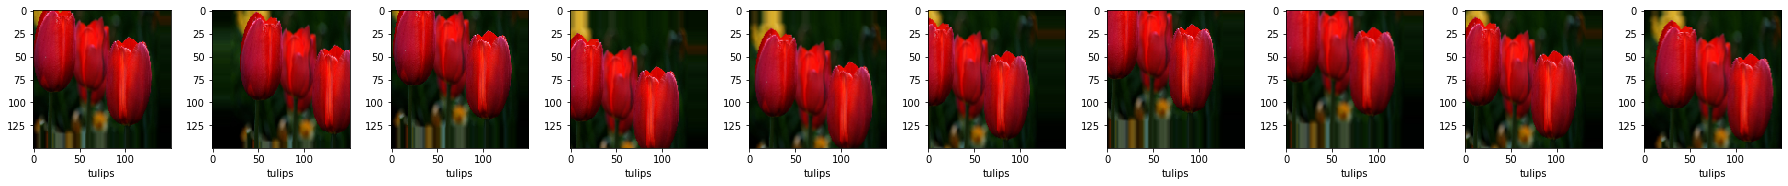

In [0]:
sample = [(train_image_gen[0][0][0], train_image_gen[0][1][0]) for i in range(10)]
plotImage(sample)

## Put it all together

In [10]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.5,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=45
)

train_image_gen = image_gen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, target_size=(IMG_SHAPE, IMG_SHAPE), shuffle=True)

Found 2935 images belonging to 5 classes.


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


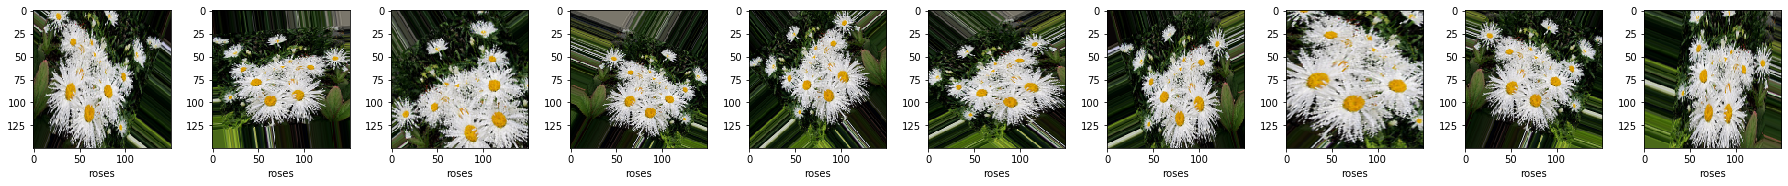

In [11]:
sample = [(train_image_gen[0][0][0], train_image_gen[0][1][0]) for i in range(10)]
plotImage(sample)

## Validation set

In [12]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_image_gen = image_gen.flow_from_directory(val_dir, shuffle=False, target_size=(IMG_SHAPE, IMG_SHAPE), batch_size=BATCH_SIZE)

Found 735 images belonging to 5 classes.


# Model building

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

# Model compilation

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Training

In [0]:
def train_model(model):
  return model.fit_generator(
      train_image_gen, 
      steps_per_epoch=np.ceil(num_train/BATCH_SIZE), 
      epochs=EPOCH, 
      validation_data=val_image_gen, 
      validation_steps=np.ceil(num_val/BATCH_SIZE),
      # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
  )

In [0]:
history = train_model(model)

Instructions for updating:
Please use Model.fit, which supports generators.


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30.0 steps, validate for 8.0 steps
Epoch 1/40


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 27s 894ms/step - loss: 1.5677 - accuracy: 0.3612 - val_loss: 1.1628 - val_accuracy: 0.4748
Epoch 2/40
30/30 [==============================] - 23s 751ms/step - loss: 1.1758 - accuracy: 0.4845 - val_loss: 1.0927 - val_accuracy: 0.5769
Epoch 3/40
30/30 [==============================] - 23s 755ms/step - loss: 1.0914 - accuracy: 0.5523 - val_loss: 1.1166 - val_accuracy: 0.5442
Epoch 4/40
30/30 [==============================] - 22s 747ms/step - loss: 1.0329 - accuracy: 0.5871 - val_loss: 1.1126 - val_accuracy: 0.5714
Epoch 5/40
30/30 [==============================] - 23s 750ms/step - loss: 0.9975 - accuracy: 0.6055 - val_loss: 0.9274 - val_accuracy: 0.6327
Epoch 6/40
30/30 [==============================] - 22s 744ms/step - loss: 0.9328 - accuracy: 0.6310 - val_loss: 1.0033 - val_accuracy: 0.6136
Epoch 7/40
30/30 [==============================] - 23s 751ms/step - loss: 0.8987 - accuracy: 0.6446 - val_loss: 0.8535 - val_accuracy: 0.6898
Epoch 8/40

In [0]:
def plot_history(history):
  plt.figure(figsize=(15, 5))
  ax = plt.subplot(1, 2, 1)
  ax.plot(history.history['accuracy'], label="train_acc")
  ax.plot(history.history['val_accuracy'], label='val_acc')
  ax.set_title("Accuracy")
  ax.legend()

  ax = plt.subplot(1, 2, 2)
  ax.plot(history.history['loss'], label="train_loss")
  ax.plot(history.history['val_loss'], label='val_loss')
  ax.set_title("Loss")
  ax.legend()

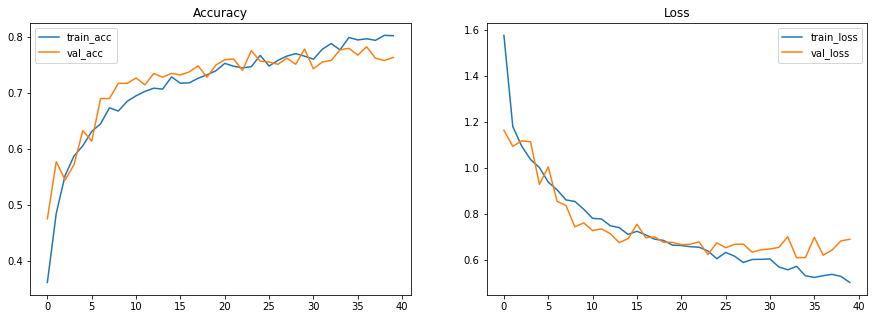

In [0]:
plot_history(history)

# Add a dropout

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

Instructions for updating:
Please use Model.fit, which supports generators.


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30.0 steps, validate for 8.0 steps
Epoch 1/80


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 27s 904ms/step - loss: 1.5123 - accuracy: 0.3506 - val_loss: 1.3351 - val_accuracy: 0.3864
Epoch 2/80
30/30 [==============================] - 22s 745ms/step - loss: 1.2138 - accuracy: 0.4818 - val_loss: 1.1012 - val_accuracy: 0.5429
Epoch 3/80
30/30 [==============================] - 22s 746ms/step - loss: 1.0910 - accuracy: 0.5441 - val_loss: 1.0117 - val_accuracy: 0.5905
Epoch 4/80
30/30 [==============================] - 22s 746ms/step - loss: 1.0340 - accuracy: 0.5823 - val_loss: 0.9405 - val_accuracy: 0.6259
Epoch 5/80
30/30 [==============================] - 22s 741ms/step - loss: 0.9946 - accuracy: 0.6010 - val_loss: 0.9629 - val_accuracy: 0.6435
Epoch 6/80
30/30 [==============================] - 22s 742ms/step - loss: 0.9706 - accuracy: 0.6181 - val_loss: 0.8785 - val_accuracy: 0.6653
Epoch 7/80
30/30 [==============================] - 22s 747ms/step - loss: 0.9479 - accuracy: 0.6266 - val_loss: 0.8425 - val_accuracy: 0.6803
Epoch 8/80

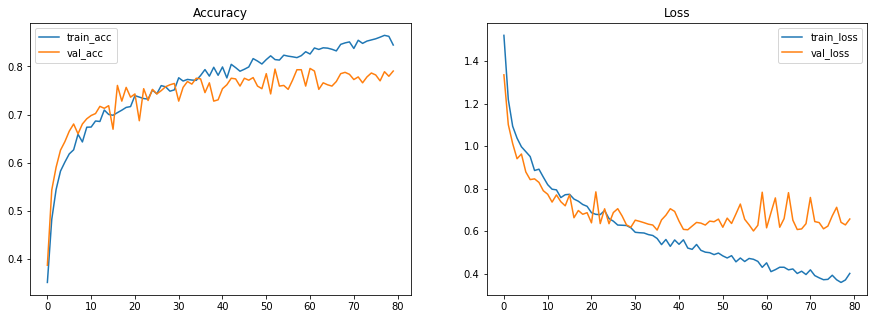

In [17]:
history = train_model(model)
plot_history(history)

# Batch normalization

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30.0 steps, validate for 8.0 steps
Epoch 1/40


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 23s 753ms/step - loss: 1.8137 - accuracy: 0.4235 - val_loss: 1.5910 - val_accuracy: 0.2327
Epoch 2/40
30/30 [==============================] - 22s 737ms/step - loss: 1.1945 - accuracy: 0.5138 - val_loss: 1.5860 - val_accuracy: 0.2354
Epoch 3/40
30/30 [==============================] - 22s 735ms/step - loss: 1.0962 - accuracy: 0.5721 - val_loss: 1.5733 - val_accuracy: 0.3184
Epoch 4/40
30/30 [==============================] - 22s 742ms/step - loss: 1.0527 - accuracy: 0.5908 - val_loss: 1.5463 - val_accuracy: 0.2517
Epoch 5/40
30/30 [==============================] - 22s 737ms/step - loss: 1.0273 - accuracy: 0.5888 - val_loss: 1.5297 - val_accuracy: 0.2707
Epoch 6/40
30/30 [==============================] - 22s 736ms/step - loss: 0.9766 - accuracy: 0.6116 - val_loss: 1.4894 - val_accuracy: 0.3755
Epoch 7/40
30/30 [==============================] - 22s 744ms/step - loss: 0.9238 - accuracy: 0.6303 - val_loss: 1.4848 - val_accuracy: 0.3061
Epoch 8/40

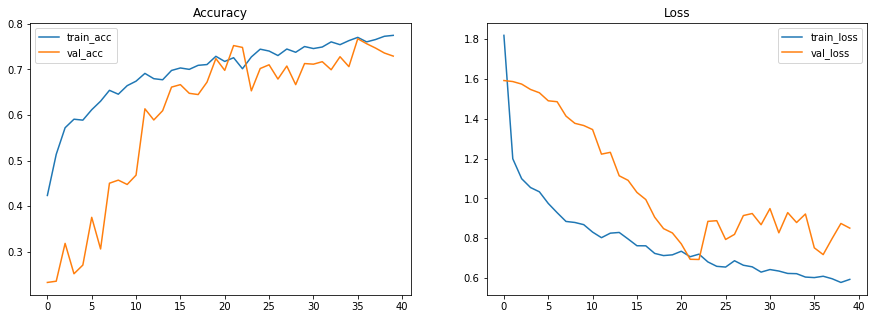

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = train_model(model)
plot_history(history)

# Increasing the number of filters


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30.0 steps, validate for 8.0 steps
Epoch 1/40


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 23s 778ms/step - loss: 1.4047 - accuracy: 0.3625 - val_loss: 1.2022 - val_accuracy: 0.4816
Epoch 2/40
30/30 [==============================] - 23s 753ms/step - loss: 1.1615 - accuracy: 0.5026 - val_loss: 1.1019 - val_accuracy: 0.5524
Epoch 3/40
30/30 [==============================] - 23s 752ms/step - loss: 1.0249 - accuracy: 0.5860 - val_loss: 0.9624 - val_accuracy: 0.6095
Epoch 4/40
30/30 [==============================] - 23s 755ms/step - loss: 0.9926 - accuracy: 0.5969 - val_loss: 1.0629 - val_accuracy: 0.5959
Epoch 5/40
30/30 [==============================] - 23s 759ms/step - loss: 0.9571 - accuracy: 0.6204 - val_loss: 0.8572 - val_accuracy: 0.6571
Epoch 6/40
30/30 [==============================] - 23s 756ms/step - loss: 0.8804 - accuracy: 0.6494 - val_loss: 0.8397 - val_accuracy: 0.6803
Epoch 7/40
30/30 [==============================] - 23s 755ms/step - loss: 0.8390 - accuracy: 0.6702 - val_loss: 0.9696 - val_accuracy: 0.6354
Epoch 8/40

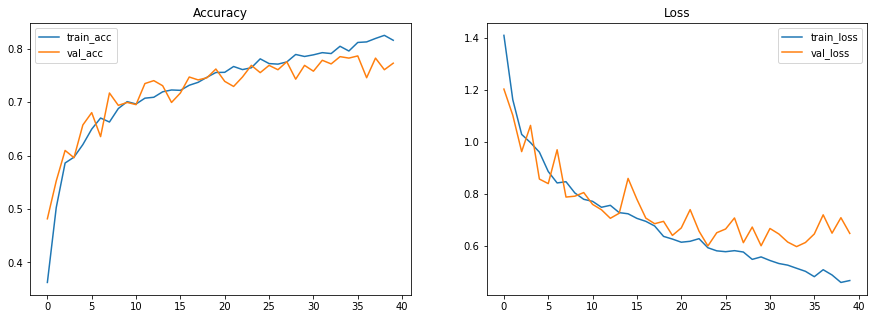

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = train_model(model)
plot_history(history)

# Batch normalization v2

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = train_model(model)

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30.0 steps, validate for 8.0 steps
Epoch 1/40


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 23s 776ms/step - loss: 2.0472 - accuracy: 0.3918 - val_loss: 1.6818 - val_accuracy: 0.3388
Epoch 2/40
30/30 [==============================] - 23s 753ms/step - loss: 1.2807 - accuracy: 0.4855 - val_loss: 1.3968 - val_accuracy: 0.3837
Epoch 3/40
30/30 [==============================] - 23s 756ms/step - loss: 1.1723 - accuracy: 0.5281 - val_loss: 1.3288 - val_accuracy: 0.3565
Epoch 4/40
30/30 [==============================] - 23s 763ms/step - loss: 1.1394 - accuracy: 0.5428 - val_loss: 1.3045 - val_accuracy: 0.3551
Epoch 5/40
30/30 [==============================] - 23s 752ms/step - loss: 1.0508 - accuracy: 0.5853 - val_loss: 1.4368 - val_accuracy: 0.2571
Epoch 6/40
30/30 [==============================] - 22s 748ms/step - loss: 1.0122 - accuracy: 0.6164 - val_loss: 1.4902 - val_accuracy: 0.3415
Epoch 7/40
30/30 [==============================] - 23s 759ms/step - loss: 0.9696 - accuracy: 0.6228 - val_loss: 1.3014 - val_accuracy: 0.3646
Epoch 8/40

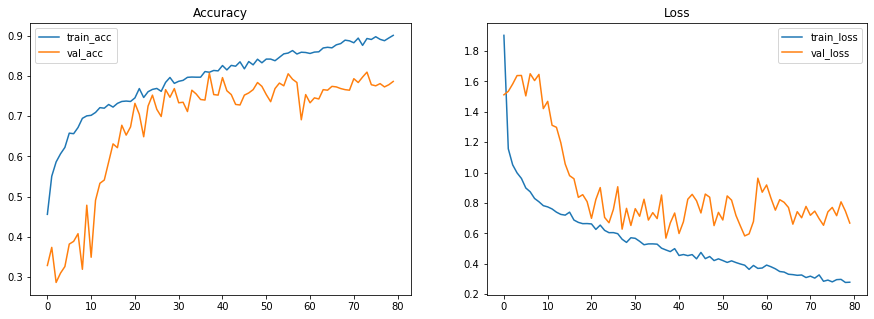

In [0]:
plot_history(history)

# Batch norm before activation

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64, (3,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("relu"),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("relu"),
  tf.keras.layers.Dense(len(classes)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("softmax")
])

In [17]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = train_model(model)

Instructions for updating:
Please use Model.fit, which supports generators.


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30.0 steps, validate for 8.0 steps
Epoch 1/40


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 27s 912ms/step - loss: 1.2250 - accuracy: 0.5063 - val_loss: 2.0828 - val_accuracy: 0.2476
Epoch 2/40
30/30 [==============================] - 22s 741ms/step - loss: 1.0240 - accuracy: 0.6140 - val_loss: 2.1275 - val_accuracy: 0.2449
Epoch 3/40
30/30 [==============================] - 22s 735ms/step - loss: 0.9784 - accuracy: 0.6327 - val_loss: 2.1999 - val_accuracy: 0.2653
Epoch 4/40
30/30 [==============================] - 22s 748ms/step - loss: 0.9057 - accuracy: 0.6733 - val_loss: 2.4346 - val_accuracy: 0.1796
Epoch 5/40
30/30 [==============================] - 22s 743ms/step - loss: 0.8799 - accuracy: 0.6777 - val_loss: 2.1052 - val_accuracy: 0.2816
Epoch 6/40
30/30 [==============================] - 22s 750ms/step - loss: 0.8546 - accuracy: 0.6954 - val_loss: 2.1242 - val_accuracy: 0.2054
Epoch 7/40
30/30 [==============================] - 22s 744ms/step - loss: 0.8121 - accuracy: 0.7073 - val_loss: 1.9703 - val_accuracy: 0.2735
Epoch 8/40

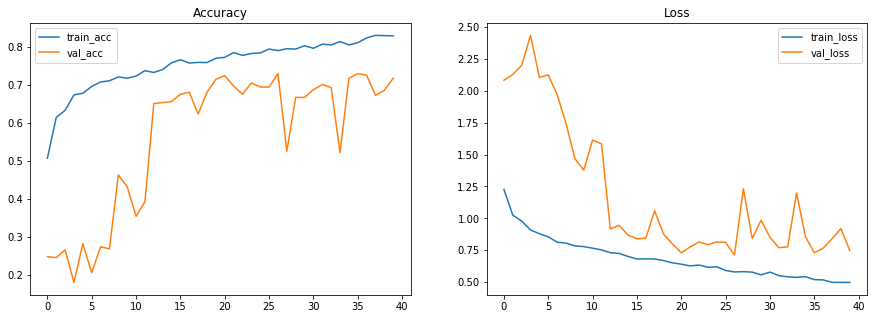

In [18]:
plot_history(history)